In [6]:
from pyspark.sql import *


In [7]:
import pyspark.mllib

In [1]:
sc

<SparkContext master=local[2] appName=PySparkShell>

# Understanding the Video Games Dataset

## Contents of the data

We picked the dataset from kagggle. 
This is the link for dataset - https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/home

Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, we have:-
1. Critic_score - Aggregate score compiled by Metacritic staff
2. Critic_count - The number of critics used in coming up with the Critic_score
3. User_score - Score by Metacritic's subscribers
4. User_count - Number of users who gave the user_score
5. Developer - Party responsible for creating the game
6. Rating - The ESRB ratings



In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('video_game_sales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# NA_Sales, EU_Sales, JP_Sales and Other_Sales are redundant information in this case
# As our main interest is in Finding relation for Sales, with provided Critic_score and User_Score

# Which is why we will pick only specific columns

# Also cleaned data removing all the rows which has Nan or empty values or tbd for ratings

df_filter = pd.read_csv('cleaned_video_games_data.csv')
df_filter

,Name,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
0,Wii Sports,76.0,51,8.0,322.0,82.53
1,Mario Kart Wii,82.0,73,8.3,709.0,35.52
2,Wii Sports Resort,80.0,73,8.0,192.0,32.77
3,New Super Mario Bros.,89.0,65,8.5,431.0,29.80
4,Wii Play,58.0,41,6.6,129.0,28.92
5,New Super Mario Bros. Wii,87.0,80,8.4,594.0,28.32
6,Mario Kart DS,91.0,64,8.6,464.0,23.21
7,Wii Fit,80.0,63,7.7,146.0,22.70
8,Kinect Adventures!,61.0,45,6.3,106.0,21.81
9,Wii Fit Plus,80.0,33,7.4,52.0,21.79


In [17]:
!sed 1d cleaned_video_games_data.csv > video_games_no_header.csv

In [36]:

raw_data = sc.textFile("video_games_no_header.csv")

In [37]:
raw_data

video_games_no_header.csv MapPartitionsRDD[93] at textFile at NativeMethodAccessorImpl.java:0

In [38]:
records = raw_data.map(lambda x: x.split(","))

In [40]:
first = records.first()

In [41]:
print (first)

['76', '51', '8', '322', '82.53']


In [42]:
records.cache()

PythonRDD[96] at RDD at PythonRDD.scala:52

In [43]:
def get_mapping(rdd, idx):
    return rdd.map(lambda fields: fields[idx]).distinct().zipWithIndex().collectAsMap()

In [44]:
print ("Mapping of first categorical feasture column: %s" % (get_mapping(records, 2)))

Mapping of first categorical feasture column: {'8': 0, '6.6': 1, '8.4': 2, '8.6': 3, '7.7': 4, '8.2': 5, '9': 6, '7.1': 7, '4.8': 8, '8.9': 9, '6.4': 10, '2.6': 11, '7.2': 12, '9.2': 13, '7.3': 14, '7.6': 15, '9.1': 16, '6.5': 17, '9.4': 18, '6.8': 19, '6.7': 20, '5.4': 21, '4': 22, '6.2': 23, '4.2': 24, '5.9': 25, '3.9': 26, '3.1': 27, '2.9': 28, '1.9': 29, '2.2': 30, '9.5': 31, '3.6': 32, '1.7': 33, '2.7': 34, '2.4': 35, '1.5': 36, '2.3': 37, '0.5': 38, '0.6': 39, '1': 40, '1.3': 41, '0.7': 42, '8.3': 43, '8.5': 44, '6.3': 45, '7.4': 46, '7.9': 47, '8.1': 48, '8.7': 49, '3.4': 50, '5.3': 51, '3.2': 52, '7.8': 53, '7.5': 54, '7': 55, '4.3': 56, '5.7': 57, '5': 58, '8.8': 59, '6.9': 60, '6.1': 61, '9.3': 62, '6': 63, '4.9': 64, '3.7': 65, '4.1': 66, '5.8': 67, '5.6': 68, '5.5': 69, '4.4': 70, '4.6': 71, '5.2': 72, '3.3': 73, '4.5': 74, '5.1': 75, '3.5': 76, '2.5': 77, '2': 78, '4.7': 79, '2.1': 80, '1.8': 81, '3.8': 82, '3': 83, '9.6': 84, '2.8': 85, '1.2': 86, '0.9': 87, '1.4': 88}


In [29]:
mappings = [get_mapping(records, i) for i in range(2,6)]
cat_len = sum(map(len, mappings))
num_len = len(records.first()[2:6])
total_len = num_len + cat_len

In [30]:
print ("Feature vector length for categorical features: %d " % cat_len)
print ("Feature vector length for numerical features: %d " % num_len)
print ("Total feature vector length: %d " % total_len)

Feature vector length for categorical features: 1673 
Feature vector length for numerical features: 4 
Total feature vector length: 1677 


In [111]:
from pyspark.mllib.regression import LabeledPoint

import numpy as np


def extract_features(record):
    return np.array(list(map(float, record)))

def extract_label(record):
    return float(record[-1])

extract_features(records.first())

array([ 76.  ,  51.  ,   8.  , 322.  ,  82.53])

In [112]:
data = records.map(lambda r: LabeledPoint(extract_label(r), extract_features(r)))

In [113]:
first_point = data.first()

In [115]:
print ("Raw Data" + str(first[2:]))

print ("Label:" + str(first_point.label))

print ("Linear Model feature vector:\n" + str(first_point.features))

print ("Linear Model feature vector length: " + str(len(first_point.features)))

Raw Data['8', '322', '82.53']
Label:82.53
Linear Model feature vector:
[76.0,51.0,8.0,322.0,82.53]
Linear Model feature vector length: 5


In [116]:
# Extract features of decision tree. 

def extract_features_dt(record):
    return np.array(list(map(float, record)))

# def extract_features_dt(record):
#     cat_vec = np.zeros(cat_len)
#     i = 0
#     step = 0
#     for field in record[2:9]:
#         m = mappings[i]
#         idx = m[field]
#         cat_vec[idx + step] = 1
#         i = i + 1
#         step = step + len(m)
#     num_vec = np.array([float(field) for field in record[10:14]])
#     return np.concatenate((cat_vec, num_vec))



data_dt = records.map(lambda r: LabeledPoint(extract_label(r), extract_features_dt(r)))

# label = extract_label(records.first())
# print (label)
# features_array = extract_features_dt(records.first())
# print (features_array)

# LabeledPoint(label, features_array)

data_dt.count()

first_point_dt = data_dt.first()

print ("Decision Tree feature vector: "  + str(first_point_dt.features))

print ("Decision Tree feature vector length:" + str(len(first_point_dt.features)))


Decision Tree feature vector: [76.0,51.0,8.0,322.0,82.53]
Decision Tree feature vector length:5


In [78]:
data_dt.__dict__

{'func': <function pyspark.rdd.RDD.map.<locals>.func(_, iterator)>,
 'preservesPartitioning': False,
 '_prev_jrdd': JavaObject id=o587,
 '_prev_jrdd_deserializer': AutoBatchedSerializer(PickleSerializer()),
 'is_cached': False,
 'is_checkpointed': False,
 'ctx': <SparkContext master=local[2] appName=PySparkShell>,
 'prev': PythonRDD[96] at RDD at PythonRDD.scala:52,
 '_jrdd_val': None,
 '_id': None,
 '_jrdd_deserializer': AutoBatchedSerializer(PickleSerializer()),
 '_bypass_serializer': False,
 'partitioner': None}

In [117]:
from pyspark.mllib.regression import LinearRegressionWithSGD
linear_model = LinearRegressionWithSGD.train(data, iterations=10, step=0.1, intercept=False)

In [118]:
true_vs_predicted = data.map(lambda p: (p.label, linear_model.predict(p.features)))

In [119]:
print ("Linear Model predictions: " + str(true_vs_predicted.take(5)))

Linear Model predictions: [(82.53, -9.532742483117275e+41), (35.52, -2.0857129271212325e+42), (32.77, -5.754629611767461e+41), (29.8, -1.2739658869293097e+42), (28.92, -3.8658302580054664e+41)]


In [120]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

dt_model = DecisionTree.trainRegressor(data_dt,{})

preds = dt_model.predict(data_dt.map(lambda p: p.features))

actual = data.map(lambda p: p.label)

true_vs_predicted_dt = actual.zip(preds)

print ("Decision Tree predictions: " + str(true_vs_predicted_dt.take(5)))

print ("Decision Tree depth: " + str(dt_model.depth()))

print ("Decision Tree number of nodes: " + str(dt_model.numNodes()))

Decision Tree predictions: [(82.53, 82.53000000000002), (35.52, 7.967142857142857), (32.77, 32.77), (29.8, 13.096666666666668), (28.92, 19.666666666666668)]
Decision Tree depth: 5
Decision Tree number of nodes: 61


In [83]:
def squared_error(actual, predicted):
    return (predicted - actual)**2

In [84]:
def abs_error(actual, pred):
    return np.abs(pred - actual)

In [131]:
def squared_log_error(pred, actual):
    try:
        return (np.log(pred + 1) - np.log(actual + 1))**2
    except:
        return 0

In [127]:
true_vs_predicted.take(1600)

[(82.53, -9.532742483117275e+41),
 (35.52, -2.0857129271212325e+42),
 (32.77, -5.754629611767461e+41),
 (29.8, -1.2739658869293097e+42),
 (28.92, -3.8658302580054664e+41),
 (28.32, -1.7508896837554332e+42),
 (23.21, -1.3704858543755092e+42),
 (22.7, -4.403497637645988e+41),
 (21.81, -3.2001407092731014e+41),
 (21.79, -1.6362782388103345e+41),
 (21.04, -1.1680259935959881e+43),
 (20.81, -4.654977428753586e+42),
 (20.15, -1.5924782894129913e+41),
 (16.27, -1.0854260036811854e+43),
 (16.15, -2.1476877431721708e+42),
 (15.29, -6.716272378100843e+40),
 (14.98, -9.320868776423772e+41),
 (14.73, -2.5464225098797083e+43),
 (14.61, -4.263282780858117e+42),
 (13.79, -2.7040748192801058e+42),
 (13.67, -6.604056237608555e+42),
 (13.47, -7.898243874052346e+42),
 (13.32, -1.5300031162129658e+43),
 (13.1, -1.9547049735318005e+42),
 (12.84, -4.870923598148105e+42),
 (12.66, -1.8610845404405264e+42),
 (12.63, -3.209695248116546e+42),
 (12.61, -8.483211345809252e+42),
 (12.13, -7.209692492723968e+41),
 

In [132]:
# 6.1 Linear Model

mse = true_vs_predicted.map(lambda args: squared_error(args[0], args[1])).mean()

mae = true_vs_predicted.map(lambda args: abs_error(args[0], args[1])).mean()

rmsle = np.sqrt(true_vs_predicted.map(lambda args: squared_log_error(args[0], args[1])).mean())

print ("Linear Model – Mean Squared Error: %2.4f" % mse)

print ("Linear Model – Mean Absolute Error: %2.4f" % mae)

print ("Linear Model – Root Mean Squared Log Error: %2.4f" % rmsle)

Linear Model – Mean Squared Error: 3159985614760480624623411957152117393725539033753471703486346793669268192382997757952.0000
Linear Model – Mean Absolute Error: 516867991159445174028856725823761103716352.0000
Linear Model – Root Mean Squared Log Error: nan


/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:80: RuntimeWarning: invalid value encountered in maximum
  self.maxValue = maximum(self.maxValue, other.maxValue)
/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:81: RuntimeWarning: invalid value encountered in minimum
  self.minValue = minimum(self.minValue, other.minValue)


In [87]:
## 6.2 Decision Tree


mse_dt = true_vs_predicted_dt.map(lambda args: squared_error(args[0], args[1])).mean()

mae_dt = true_vs_predicted_dt.map(lambda args: abs_error(args[0], args[1])).mean()

rmsle_dt = np.sqrt(true_vs_predicted_dt.map(lambda args: squared_log_error(args[0], args[1])).mean())

print ("Decision Tree – Mean Squared Error: %2.4f" % mse_dt)

print ("Decision Tree – Mean Absolute Error: %2.4f" % mae_dt)

print ("Decision Tree – Root Mean Squared Log Error: %2.4f" % rmsle_dt)

Decision Tree – Mean Squared Error: 0.6153
Decision Tree – Mean Absolute Error: 0.1360
Decision Tree – Root Mean Squared Log Error: 0.0761


In [88]:
## 6.3.1 Transforming the target variable
# Usually the we assume distribution to be uniform
# Similary we know for sure in this Dataset, the bike count can never be negative

%pylab inline

Populating the interactive namespace from numpy and matplotlib


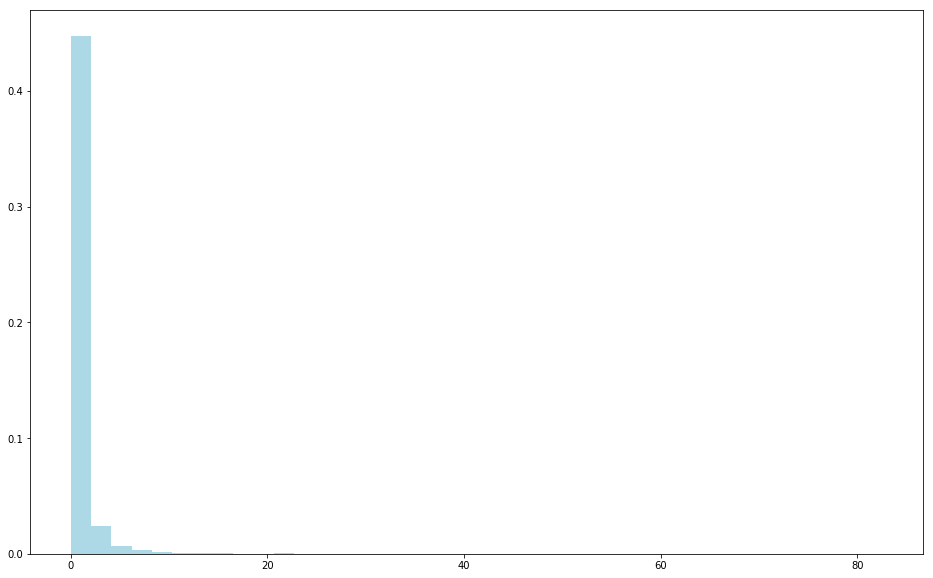

In [89]:
targets = records.map(lambda r: float(r[-1])).collect()

hist(targets, bins=40, color="lightblue", density=True)

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(16, 10)

# Looking at the histogram plot, 
# we can see that the distribution is highly skewed and 
# certainly does not follow a normal distribution:

# Figure 1: Distribution of raw target variable values

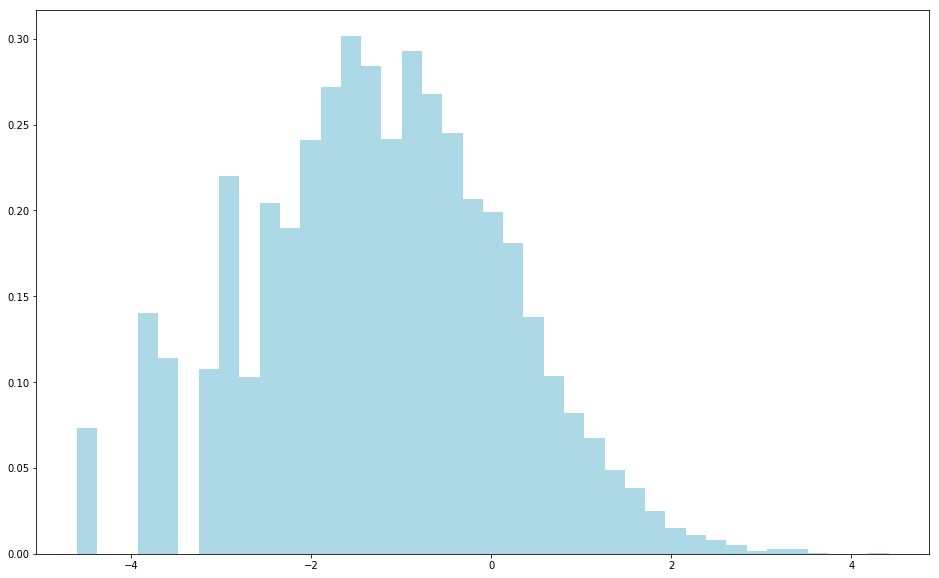

In [90]:
# As count cannot be negative during the prediction, 
# We take the logarithamic value of the target value
log_targets = records.map(lambda r: np.log(float(r[-1]))).collect()

hist(log_targets, bins=40, color="lightblue", density=True)

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(16, 10)
# Figure 2: Distribution of log-transformed target variable values


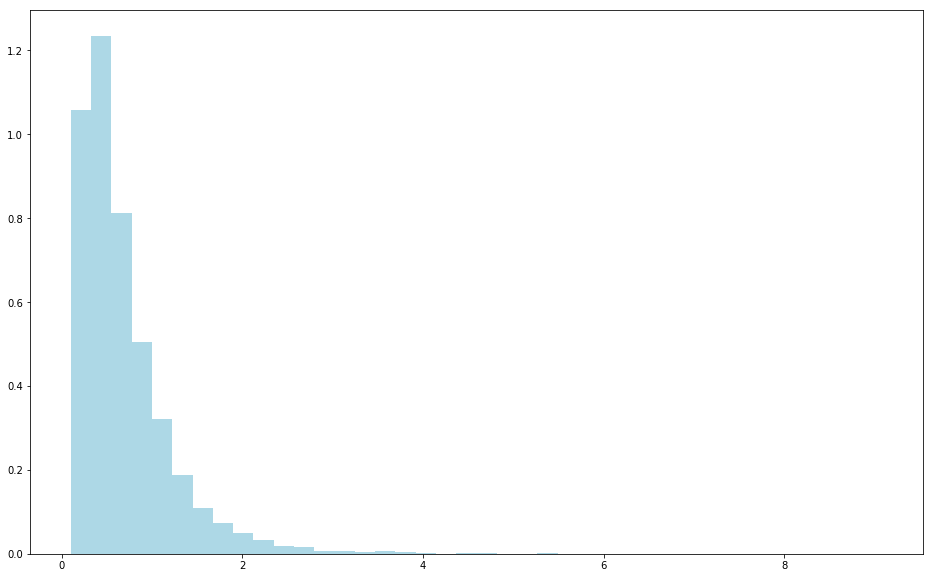

In [91]:
# Instead of logs, we can also take square roots of the target value, 
# to avoid the value to be negative.

sqrt_targets = records.map(lambda r: np.sqrt(float(r[-1]))).collect()

hist(sqrt_targets, bins=40, color="lightblue", density=True)

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(16, 10)

# Figure 3: Distribution of square-root-transformed target variable values

In [133]:
# 6.4 Impact of training on the log-transformed targets

data_log = data.map(lambda lp: LabeledPoint(np.log(lp.label), lp.features))

# We will then train a model on this transformed data and 
# form the RDD of predicted versus true values:

model_log = LinearRegressionWithSGD.train(data_log, iterations=10, step=0.1)

true_vs_predicted_log = data_log.map(lambda p: (np.exp(p.label), np.exp(model_log.predict(p.features))))

In [134]:
# Log transformed error prediction comparision with raw Data or non-log original data. 

mse_log = true_vs_predicted_log.map(lambda args: squared_error(args[0], args[1])).mean()

mae_log = true_vs_predicted_log.map(lambda args: abs_error(args[0], args[1])).mean()

rmsle_log = np.sqrt(true_vs_predicted_log.map(lambda args: squared_log_error(args[0], args[1])).mean())


print ("Mean Squared Error: %2.4f" % mse_log)

print ("Mean Absolue Error: %2.4f" % mae_log)

print ("Root Mean Squared Log Error: %2.4f" % rmsle_log)

print ("Non log-transformed predictions:\n " + str(true_vs_predicted.take(3)))

print ("Log-transformed predictions:\n" + str(true_vs_predicted_log.take(3)))

Mean Squared Error: nan
Mean Absolue Error: nan
Root Mean Squared Log Error: nan
Non log-transformed predictions:
 [(82.53, -9.532742483117275e+41), (35.52, -2.0857129271212325e+42), (32.77, -5.754629611767461e+41)]
Log-transformed predictions:
[(82.53, inf), (35.52000000000001, inf), (32.769999999999996, inf)]


In [135]:
## Similar log analysis for Decision tree

data_dt_log = data_dt.map(lambda lp: LabeledPoint(np.log(lp.label), lp.features))

dt_model_log = DecisionTree.trainRegressor(data_dt_log,{})

preds_log = dt_model_log.predict(data_dt_log.map(lambda p: p.features))

actual_log = data_dt_log.map(lambda p: p.label)

true_vs_predicted_dt_log = actual_log.zip(preds_log).map(lambda args: (np.exp(args[0]), np.exp(args[1])))




In [160]:
mse_log_dt = true_vs_predicted_dt_log.map(lambda args: squared_error(args[0], args[1])).mean()

mae_log_dt = true_vs_predicted_dt_log.map(lambda args: abs_error(args[0], args[1])).mean()

rmsle_log_dt = np.sqrt(true_vs_predicted_dt_log.map(lambda args: squared_log_error(args[0], args[1])).mean())

print ("Mean Squared Error: %2.4f" % mse_log_dt)

print ("Mean Absolue Error: %2.4f" % mae_log_dt)

print ("Root Mean Squared Log Error: %2.4f" % rmsle_log_dt)

print ("Non log-transformed predictions:\n" + str(true_vs_predicted_dt.take(3)))

print ("Log-transformed predictions:\n " + str(true_vs_predicted_dt_log.take(3)))

Mean Squared Error: 14781.5760
Mean Absolue Error: 76.4131
Root Mean Squared Log Error: 0.6406
Non log-transformed predictions:
[(16.0, 54.913223140495866), (40.0, 54.913223140495866), (32.0, 53.171052631578945)]
Log-transformed predictions:
 [(15.999999999999998, 37.53077978715451), (40.0, 37.53077978715451), (32.0, 7.279707099390729)]


In [136]:
## 6.5 Tuning model parameters

# first taking a random sample of, say, 20 percent of our data as our test

data_with_idx = data.zipWithIndex().map(lambda args: (args[1], args[0]))

test = data_with_idx.sample(False, 0.2, 42)

train = data_with_idx.subtractByKey(test)

train_data = train.map(lambda args: args[1])

test_data = test.map(lambda args: args[1])

train_size = train_data.count()

test_size = test_data.count()

print ("Training data size: %d" % train_size)

print ("Test data size: %d" % test_size)

print ("Total data size: %d " % (train_size + test_size))

print ("Train + Test size : %d" % (train_size + test_size))

Training data size: 5622
Test data size: 1393
Total data size: 7015 
Train + Test size : 7015


In [137]:
# Splitting the tree data also into training and testing

data_with_idx_dt = data_dt.zipWithIndex().map(lambda args: (args[1], args[0]))

test_dt = data_with_idx_dt.sample(False, 0.2, 42)

train_dt = data_with_idx_dt.subtractByKey(test_dt)

train_data_dt = train_dt.map(lambda args: args[1])

test_data_dt = test_dt.map(lambda args: args[1])

In [138]:
#7 Impact of parameter setting for linear models

# Evaluation function

def evaluate(train, test, iterations, step, regParam, regType, intercept):
    model = LinearRegressionWithSGD.train(
        train, iterations, step, regParam=regParam, 
        regType=regType, intercept=intercept
    )
    tp = test.map(lambda p: (p.label, model.predict(p.features)))
    rmsle = np.sqrt(tp.map(lambda args: squared_log_error(args[0], args[1])).mean())
    return rmsle

#rmsle is the root mean square linear error

In [139]:
# Comparision with diff iterations

params = [1, 5, 10, 20, 50, 100]

metrics = [evaluate(train_data, test_data, param, 0.01, 0.0, "l2", False) for param in params]

print (params)

print (metrics)

/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:80: RuntimeWarning: invalid value encountered in maximum
  self.maxValue = maximum(self.maxValue, other.maxValue)
/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:81: RuntimeWarning: invalid value encountered in minimum
  self.minValue = minimum(self.minValue, other.minValue)


[1, 5, 10, 20, 50, 100]
[5.14204184089691, 35.15610269988741, nan, nan, nan, nan]


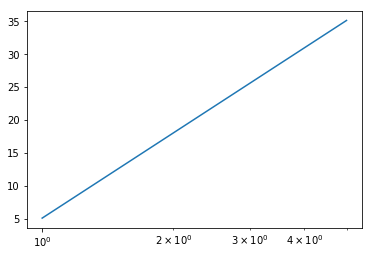

In [140]:
# Plotting RMSLE metric against number of iterations

plot(params, metrics)

fig = matplotlib.pyplot.gcf()

pyplot.xscale("log")

# Figure 4:Metrics for varying number of iterations

In [141]:
# 7.2 Performing same test, changing the step size. 

params = [0.01, 0.025, 0.05, 0.1, 1.0]

metrics = [evaluate(train_data, test_data, 10, param, 0.0, "l2", False) for param in params]

print (params)

print (metrics)

/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:80: RuntimeWarning: invalid value encountered in maximum
  self.maxValue = maximum(self.maxValue, other.maxValue)
/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:81: RuntimeWarning: invalid value encountered in minimum
  self.minValue = minimum(self.minValue, other.minValue)


[0.01, 0.025, 0.05, 0.1, 1.0]
[nan, nan, nan, nan, nan]


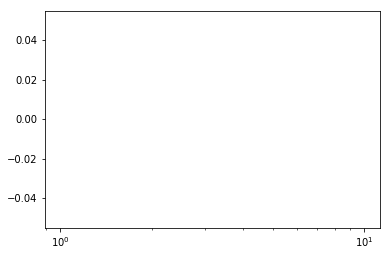

In [142]:
plot(params, metrics)

fig = matplotlib.pyplot.gcf()

pyplot.xscale("log")

# Figure 5:Metrics for varying values of step size

/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:80: RuntimeWarning: invalid value encountered in maximum
  self.maxValue = maximum(self.maxValue, other.maxValue)
/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:81: RuntimeWarning: invalid value encountered in minimum
  self.minValue = minimum(self.minValue, other.minValue)


[0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]
[nan, nan, nan, nan, nan, nan, nan]


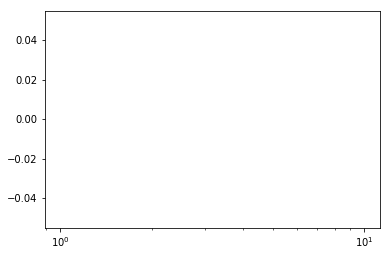

In [143]:
# 7.3 L2 Regularization

params = [0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]

metrics = [evaluate(train_data, test_data, 10, 0.1, param, "l2", False) for param in params]

print (params)

print (metrics)

plot(params, metrics)

fig = matplotlib.pyplot.gcf()

pyplot.xscale("log")

# Figure 6: Metrics for varying levels of L2 regularization

/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:80: RuntimeWarning: invalid value encountered in maximum
  self.maxValue = maximum(self.maxValue, other.maxValue)
/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:81: RuntimeWarning: invalid value encountered in minimum
  self.minValue = minimum(self.minValue, other.minValue)


[0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
[nan, nan, nan, nan, nan, nan, 0.6095766777191647]


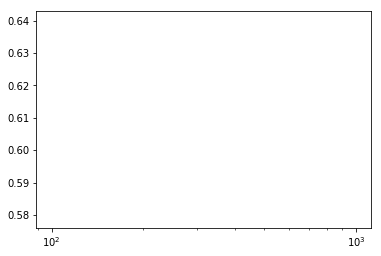

In [144]:
# 7.4 L1 Regularization

params = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

metrics = [evaluate(train_data, test_data, 10, 0.1, param, "l1", False) for param in params]

print (params)

print (metrics)

plot(params, metrics)

fig = matplotlib.pyplot.gcf()

pyplot.xscale("log")

# Figure 7: Metrics for varying levels of L1 regularization

In [145]:
# L1 Regularization using sparse weight vectors

model_l1 = LinearRegressionWithSGD.train(train_data, 10, 0.1, regParam=1.0, regType="l1", intercept=False)

model_l1_10 = LinearRegressionWithSGD.train(train_data, 10, 0.1, regParam=10.0, regType="l1", intercept=False)

model_l1_100 = LinearRegressionWithSGD.train(train_data, 10, 0.1, regParam=100.0, regType="l1", intercept=False)

print ("L1 (1.0) number of zero weights: " + str(sum(model_l1.weights.array == 0)))

print ("L1 (10.0) number of zeros weights: " + str(sum(model_l1_10.weights.array == 0)))

print ("L1 (100.0) number of zeros weights: " +str(sum(model_l1_100.weights.array == 0)))

L1 (1.0) number of zero weights: 0
L1 (10.0) number of zeros weights: 0
L1 (100.0) number of zeros weights: 0


/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:80: RuntimeWarning: invalid value encountered in maximum
  self.maxValue = maximum(self.maxValue, other.maxValue)
/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:81: RuntimeWarning: invalid value encountered in minimum
  self.minValue = minimum(self.minValue, other.minValue)


[False, True]
[nan, nan]


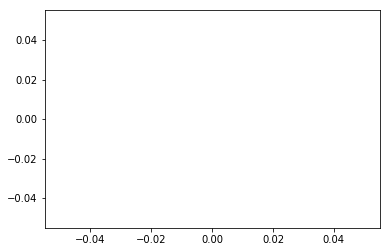

In [146]:
# 7.5 Intercept

params = [False, True]

metrics = [evaluate(train_data, test_data, 10, 0.1, 1.0, "l2", param) for param in params]

print (params)

print (metrics)

bar(params, metrics, color="lightblue")

fig = matplotlib.pyplot.gcf()

# Figure 8: Metrics without and with an intercept

In [148]:
# 8 The impact of parameter on Decision Tree

def evaluate_dt(train, test, maxDepth, maxBins):
    model = DecisionTree.trainRegressor(
        train, {}, impurity="variance", 
        maxDepth=maxDepth, 
        maxBins=maxBins
    )
    preds = model.predict(test.map(lambda p: p.features))
    actual = test.map(lambda p: p.label)
    tp = actual.zip(preds)
    rmsle = np.sqrt(tp.map(lambda args: squared_log_error(args[0], args[1])).mean())
    return rmsle


[1, 2, 3, 4, 5, 10, 20]
[0.351675251599837, 0.22608782586716028, 0.15230725474973472, 0.1247981804172865, 0.10804193567323309, 0.11091392368858516, 0.11542890883882688]


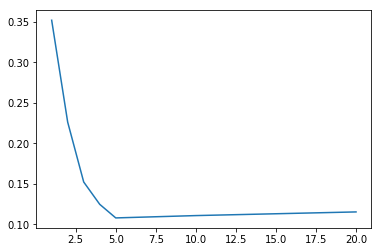

In [149]:
# 8.1 Tree Depth

params = [1, 2, 3, 4, 5, 10, 20]

metrics = [evaluate_dt(train_data_dt, test_data_dt, param, 32) for param in params]

print (params)

print (metrics)

plot(params, metrics)

fig = matplotlib.pyplot.gcf()

# Figure 9: Metrics for different tree depths

[2, 4, 8, 16, 32, 64, 100]
[0.3474424656785959, 0.24630690021316892, 0.18423809464674207, 0.13937439629773382, 0.10804193567323309, 0.07044175062981944, 0.06551171843173652]


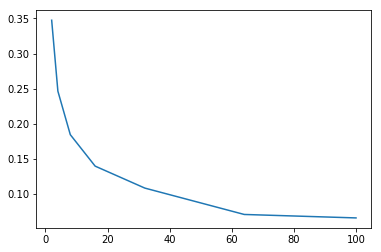

In [150]:
# 8.2 Maximum bins

params = [2, 4, 8, 16, 32, 64, 100]

metrics = [evaluate_dt(train_data_dt, test_data_dt, 5, param) for param in params]

print (params)

print (metrics)

plot(params, metrics)

fig = matplotlib.pyplot.gcf()

# Figure 10: Metrics for different maximum bins

In [151]:
train_data_dt.first().label

21.81

In [152]:
## Analysis for Gradient Boosted Tree

from pyspark.ml.classification import GBTClassifier


from pyspark.mllib.tree import GradientBoostedTrees

# Train a GBT model.
gbt_model = GradientBoostedTrees.trainRegressor(data_dt,categoricalFeaturesInfo={}, numIterations=3)

# model = GradientBoostedTrees.trainClassifier(trainingData,
#                                              categoricalFeaturesInfo={}, numIterations=3)

# # Evaluate model on test instances and compute test error
# predictions = model.predict(testData.map(lambda x: x.features))
# labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
# testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(testData.count())
# print('Test Error = ' + str(testErr))
# print('Learned classification GBT model:')
# print(model.toDebugString())


# dt_model = DecisionTree.trainRegressor(data_dt,{})

preds = gbt_model.predict(data_dt.map(lambda p: p.features))

actual = data.map(lambda p: p.label)

true_vs_predicted_gbt = actual.zip(preds)

print ("Gradient Boosted Tree predictions: " + str(true_vs_predicted_gbt.take(5)))

print ("Gradient Boosted Tree Tree depth: " + str(gbt_model.numTrees()))

print ("Gradient Boosted Tree number of nodes: " + str(gbt_model.totalNumNodes()))

## Error rates for Gradient Boosted Trees

mse_dt = true_vs_predicted_gbt.map(lambda args: squared_error(args[0], args[1])).mean()

mae_dt = true_vs_predicted_gbt.map(lambda args: abs_error(args[0], args[1])).mean()

rmsle_dt = np.sqrt(true_vs_predicted_gbt.map(lambda args: squared_log_error(args[0], args[1])).mean())

print ("Gradient Boosted Tree – Mean Squared Error: %2.4f" % mse_dt)

print ("Gradient Boosted Tree – Mean Absolute Error: %2.4f" % mae_dt)

print ("Gradient Boosted Tree – Root Mean Squared Log Error: %2.4f" % rmsle_dt)

Gradient Boosted Tree predictions: [(82.53, 23.37982892912619), (35.52, 8.204694520524034), (32.77, 23.37982892912619), (29.8, 8.204694520524034), (28.92, 8.224252792881304)]
Gradient Boosted Tree Tree depth: 3
Gradient Boosted Tree number of nodes: 45
Gradient Boosted Tree – Mean Squared Error: 1.4402
Gradient Boosted Tree – Mean Absolute Error: 0.2437
Gradient Boosted Tree – Root Mean Squared Log Error: 0.1247


In [153]:
# Gradient boost tree iterations 
# 8 The impact of parameter on Gradient Boosted Tree

def evaluate_gradient_boosted_tree(train, test, maxDepth, maxBins):
    gbt_model = GradientBoostedTrees.trainRegressor(
        train, categoricalFeaturesInfo={},
        numIterations=2,
        maxDepth=maxDepth, maxBins=maxBins
    )
    preds = gbt_model.predict(test.map(lambda p: p.features))
    # preds = model.predict(test.map(lambda p: p.features))
    actual = test.map(lambda p: p.label)
    tp = actual.zip(preds)
    rmsle = np.sqrt(tp.map(lambda args: squared_log_error(args[0], args[1])).mean())
    return rmsle

/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:80: RuntimeWarning: invalid value encountered in maximum
  self.maxValue = maximum(self.maxValue, other.maxValue)
/home/purnesh/spark-2.3.2-bin-hadoop2.7/python/pyspark/statcounter.py:81: RuntimeWarning: invalid value encountered in minimum
  self.minValue = minimum(self.minValue, other.minValue)


[1, 2, 3, 4, 5, 10, 20]
[0.9663228026031688, 0.8978992014070067, 0.8008521121029182, 0.7007304742395022, 0.6164627680928461, nan, nan]


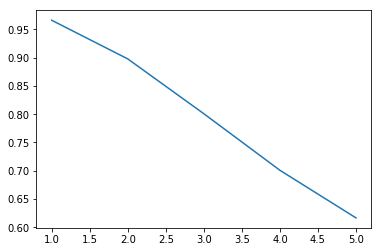

In [227]:
# Varying Gradient Boosted Depth

params = [1, 2, 3, 4, 5, 10, 20]

metrics = [evaluate_gradient_boosted_tree(train_data_dt, test_data_dt, param, 32) for param in params]

print (params)

print (metrics)

plot(params, metrics)

fig = matplotlib.pyplot.gcf()

# Figure 11: Metrics for different tree depths

[2, 4, 8, 16, 32, 64, 100]
[0.3474424656785959, 0.2462684929137444, 0.18384922640299464, 0.13760523960961, 0.10689123697316996, 0.07034814682596192, 0.06582519089711013]


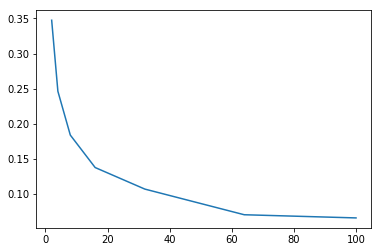

In [154]:
# Varying Gradient Boosted Tree Maximum bins

params = [2, 4, 8, 16, 32, 64, 100]

metrics = [evaluate_gradient_boosted_tree(train_data_dt, test_data_dt, 5, param) for param in params]

print (params)

print (metrics)

plot(params, metrics)

fig = matplotlib.pyplot.gcf()

# Figure 12: Metrics for different maximum bins